In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data_desc = pd.read_csv("CrimesOnWomenData.csv")

In [4]:
data_desc

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


In [5]:
df=  pd.read_csv("CrimesOnWomenData.csv", index_col=0)
df['State'] = df['State'].apply(lambda name:name.lower())

In [6]:
df.head(10)

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,andhra pradesh,2001,871,765,420,3544,2271,5791,7
1,arunachal pradesh,2001,33,55,0,78,3,11,0
2,assam,2001,817,1070,59,850,4,1248,0
3,bihar,2001,888,518,859,562,21,1558,83
4,chhattisgarh,2001,959,171,70,1763,161,840,0
5,goa,2001,12,6,2,17,7,11,0
6,gujarat,2001,286,857,67,756,111,3667,0
7,haryana,2001,398,297,285,478,401,1513,0
8,himachal pradesh,2001,124,105,10,310,14,317,0
9,jammu & kashmir,2001,169,504,13,622,288,50,0


In [7]:
df.tail(10)

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
726,uttar pradesh,2021,534,402,72,655,13,519,17
727,uttarakhand,2021,1123,7376,454,2485,424,19952,50
728,west bengal,2021,15,0,1,32,4,4,0
729,a & n islands,2021,74,120,4,37,6,95,0
730,chandigarh,2021,3,23,0,7,0,6,0
731,d&n haveli,2021,1250,4083,141,2068,417,4731,4
732,daman & diu,2021,315,904,16,1851,10,501,1
733,delhi ut,2021,2,1,0,5,1,9,0
734,lakshadweep,2021,0,0,0,1,1,3,0
735,puducherry,2021,2,0,2,31,3,12,0


In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

In [9]:
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,andhra pradesh,2001,871,765,420,3544,2271,5791,7
1,arunachal pradesh,2001,33,55,0,78,3,11,0
2,assam,2001,817,1070,59,850,4,1248,0
3,bihar,2001,888,518,859,562,21,1558,83
4,chhattisgarh,2001,959,171,70,1763,161,840,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   736 non-null    object
 1   Year    736 non-null    int64 
 2   Rape    736 non-null    int64 
 3   K&A     736 non-null    int64 
 4   DD      736 non-null    int64 
 5   AoW     736 non-null    int64 
 6   AoM     736 non-null    int64 
 7   DV      736 non-null    int64 
 8   WT      736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 57.5+ KB


In [11]:
df.describe()

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


<AxesSubplot:>

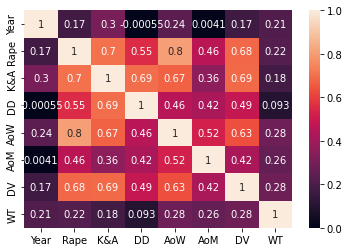

In [12]:
sns.heatmap(df.drop(columns='State').corr(),annot=True)

In [13]:
df.groupby('Year')['State'].count()

Year
2001    34
2002    34
2003    34
2004    34
2005    34
2006    34
2007    34
2008    34
2009    34
2010    34
2011    36
2012    36
2013    36
2014    36
2015    36
2016    36
2017    36
2018    36
2019    36
2020    36
2021    36
Name: State, dtype: int64

In [14]:
df.groupby('Year')['State'].nunique()

Year
2001    34
2002    34
2003    34
2004    34
2005    34
2006    34
2007    34
2008    34
2009    34
2010    34
2011    36
2012    36
2013    36
2014    36
2015    36
2016    36
2017    36
2018    36
2019    36
2020    36
2021    36
Name: State, dtype: int64

In [15]:
df.head(10)

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,andhra pradesh,2001,871,765,420,3544,2271,5791,7
1,arunachal pradesh,2001,33,55,0,78,3,11,0
2,assam,2001,817,1070,59,850,4,1248,0
3,bihar,2001,888,518,859,562,21,1558,83
4,chhattisgarh,2001,959,171,70,1763,161,840,0
5,goa,2001,12,6,2,17,7,11,0
6,gujarat,2001,286,857,67,756,111,3667,0
7,haryana,2001,398,297,285,478,401,1513,0
8,himachal pradesh,2001,124,105,10,310,14,317,0
9,jammu & kashmir,2001,169,504,13,622,288,50,0


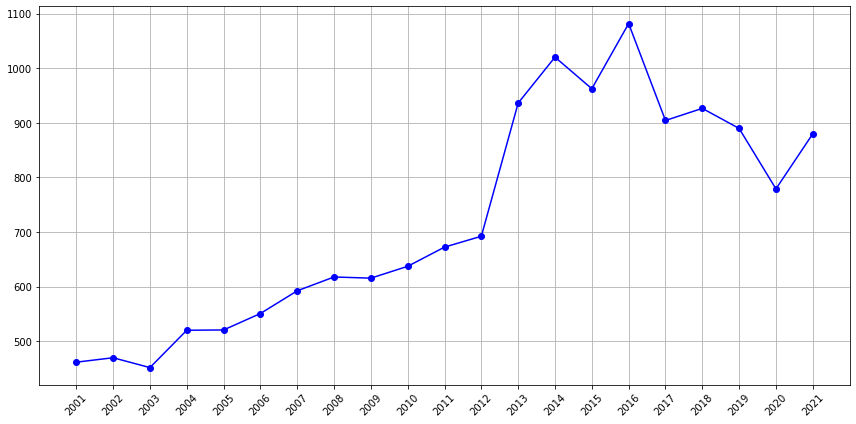

In [16]:
# Average cases of Rape in the country year wise
avg_rape_per_year = df.groupby('Year')['Rape'].mean()

# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_rape_per_year.index, avg_rape_per_year.values, marker='o', color='b', label='Average Rape Cases')
plt.grid(True)

plt.xticks(ticks=avg_rape_per_year.index, rotation=45)

plt.tight_layout()  
plt.show()


In [17]:
highest_rape_cases = df.loc[df.groupby('Year')['Rape'].idxmax()]
highest_rape_cases[['Year', 'State', 'Rape']]

,Year,State,Rape
13,2001,madhya pradesh,2851
47,2002,madhya pradesh,2891
81,2003,madhya pradesh,2738
115,2004,madhya pradesh,2875
149,2005,madhya pradesh,2921
183,2006,madhya pradesh,2900
217,2007,madhya pradesh,3010
251,2008,madhya pradesh,2937
285,2009,madhya pradesh,2998
319,2010,madhya pradesh,3135


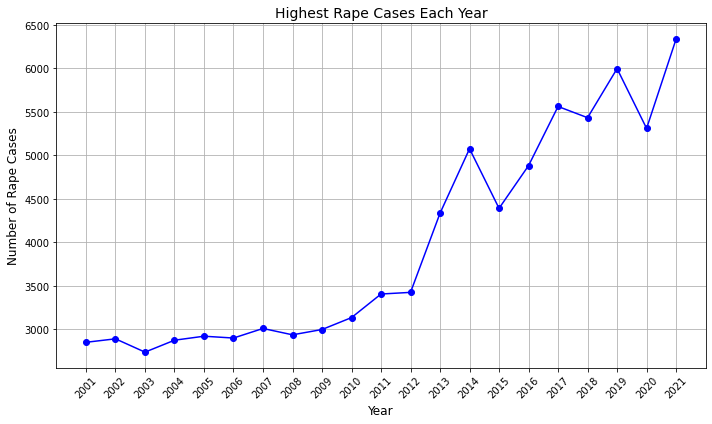

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(highest_rape_cases['Year'], highest_rape_cases['Rape'], marker='o', linestyle='-', color='b')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Rape Cases', fontsize=12)
plt.title('Highest Rape Cases Each Year', fontsize=14)

plt.grid(True)

plt.xticks(ticks=highest_rape_cases['Year'], rotation=45)

plt.tight_layout()  
plt.show()



In [19]:
lowest_rape_cases = df.loc[df.groupby('Year')['Rape'].idxmin()]
lowest_rape_cases[['Year', 'State', 'Rape']]


,Year,State,Rape
31,2001,daman & diu,0
65,2002,daman & diu,0
98,2003,d & n haveli,1
134,2004,lakshadweep,0
168,2005,lakshadweep,0
202,2006,lakshadweep,0
235,2007,daman & diu,1
269,2008,daman & diu,0
303,2009,daman & diu,1
338,2010,lakshadweep,0


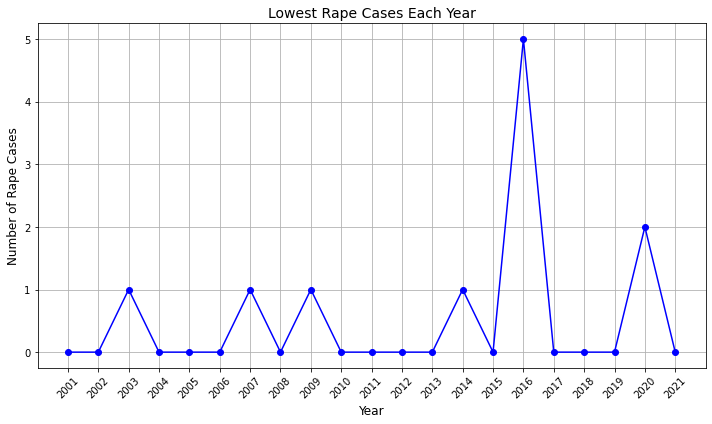

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(lowest_rape_cases['Year'], lowest_rape_cases['Rape'], marker='o', linestyle='-', color='b')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Rape Cases', fontsize=12)
plt.title('Lowest Rape Cases Each Year', fontsize=14)

plt.grid(True)

plt.xticks(ticks=lowest_rape_cases['Year'], rotation=45)

plt.tight_layout()  
plt.show()

In [21]:
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,andhra pradesh,2001,871,765,420,3544,2271,5791,7
1,arunachal pradesh,2001,33,55,0,78,3,11,0
2,assam,2001,817,1070,59,850,4,1248,0
3,bihar,2001,888,518,859,562,21,1558,83
4,chhattisgarh,2001,959,171,70,1763,161,840,0


In [22]:
columns = ['K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']

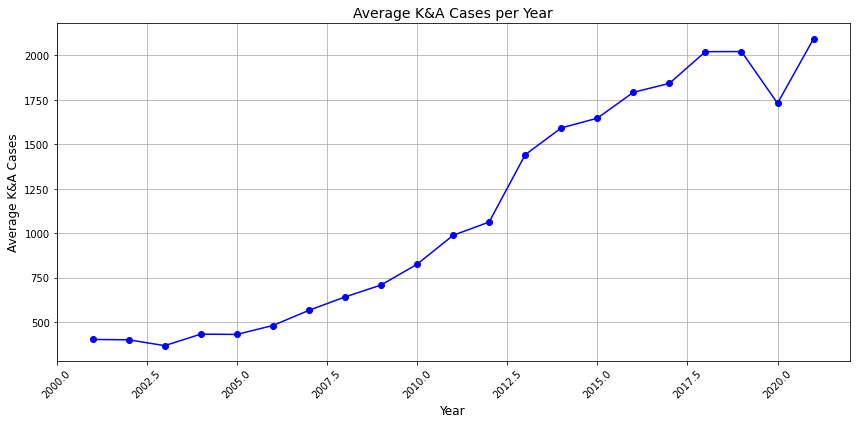

Highest K&A Cases each year:
      Year          State    K&A
25   2001  uttar pradesh   2879
59   2002  uttar pradesh   2298
89   2003      rajasthan   1750
127  2004  uttar pradesh   2324
161  2005  uttar pradesh   2256
195  2006  uttar pradesh   2551
229  2007  uttar pradesh   3363
263  2008  uttar pradesh   4439
297  2009  uttar pradesh   5078
331  2010  uttar pradesh   5468
366  2011  uttar pradesh   7525
402  2012  uttar pradesh   7910
438  2013  uttar pradesh   9737
474  2014  uttar pradesh  10626
510  2015  uttar pradesh  10135
546  2016  uttar pradesh  12994
582  2017  uttar pradesh  14993
618  2018  uttar pradesh  15381
654  2019  uttar pradesh  11649
689  2020        tripura   9109
725  2021        tripura  10574


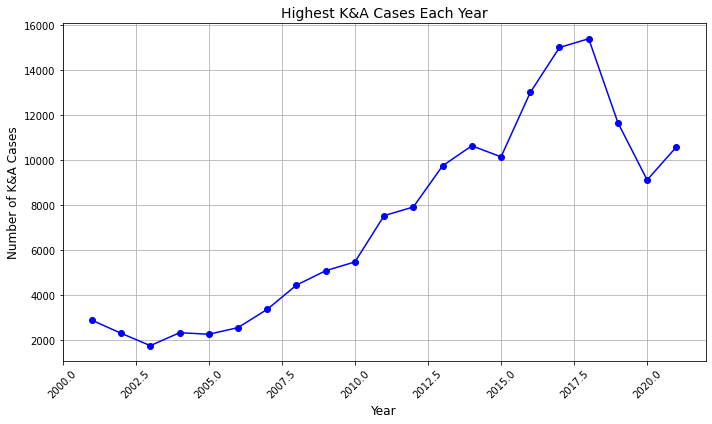

Lowest K&A Cases each year:
      Year        State  K&A
32   2001  lakshadweep    0
66   2002  lakshadweep    0
90   2003       sikkim    0
119  2004      mizoram    0
153  2005      mizoram    0
202  2006  lakshadweep    0
221  2007      mizoram    0
255  2008      mizoram    1
289  2009      mizoram    0
323  2010      mizoram    0
357  2011      mizoram    0
400  2012    telangana    0
436  2013    telangana    0
482  2014  lakshadweep    0
518  2015  lakshadweep    0
554  2016  lakshadweep    0
573  2017      mizoram    0
623  2018   d&n haveli    0
650  2019       sikkim    0
694  2020   chandigarh    0
716  2021    meghalaya    0


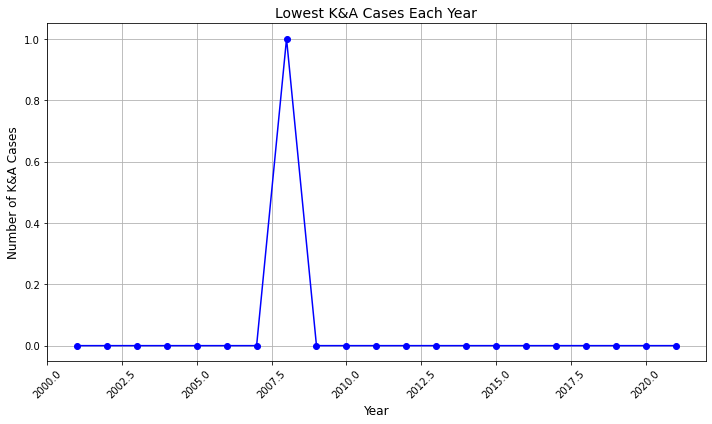

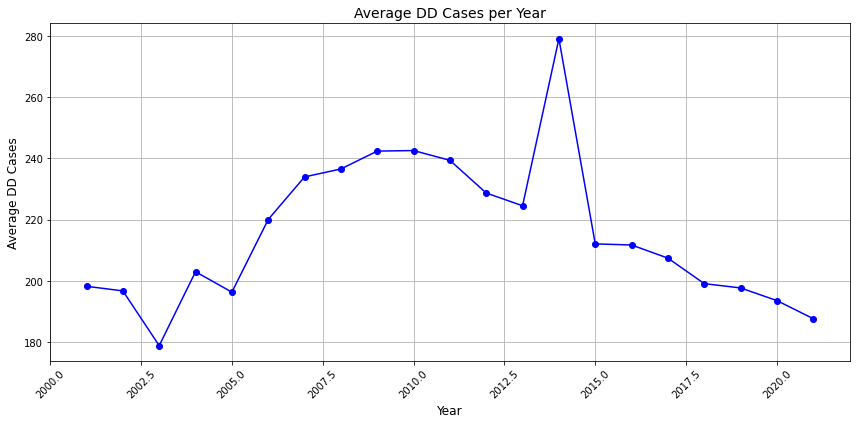

Highest DD Cases each year:
      Year          State    DD
25   2001  uttar pradesh  2211
59   2002  uttar pradesh  1893
93   2003  uttar pradesh  1322
127  2004  uttar pradesh  1708
161  2005  uttar pradesh  1564
195  2006  uttar pradesh  1798
229  2007  uttar pradesh  2076
263  2008  uttar pradesh  2237
297  2009  uttar pradesh  2232
331  2010  uttar pradesh  2217
366  2011  uttar pradesh  2322
402  2012  uttar pradesh  2244
438  2013  uttar pradesh  2335
451  2014          bihar  2203
510  2015  uttar pradesh  2335
546  2016  uttar pradesh  2473
582  2017  uttar pradesh  2524
618  2018  uttar pradesh  2444
654  2019  uttar pradesh  2410
689  2020        tripura  2274
725  2021        tripura  2222


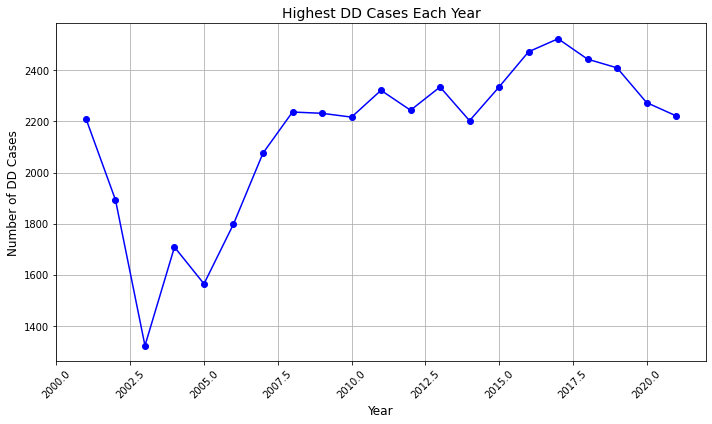

Lowest DD Cases each year:
      Year              State  DD
1    2001  arunachal pradesh   0
35   2002  arunachal pradesh   0
69   2003  arunachal pradesh   0
103  2004  arunachal pradesh   0
137  2005  arunachal pradesh   0
175  2006                goa   0
205  2007  arunachal pradesh   0
239  2008  arunachal pradesh   0
273  2009  arunachal pradesh   0
307  2010  arunachal pradesh   0
341  2011  arunachal pradesh   0
381  2012                goa   0
413  2013  arunachal pradesh   0
449  2014  arunachal pradesh   0
485  2015  arunachal pradesh   0
535  2016            manipur   0
557  2017  arunachal pradesh   0
593  2018  arunachal pradesh   0
643  2019            manipur   0
665  2020  arunachal pradesh   0
701  2021  arunachal pradesh   0


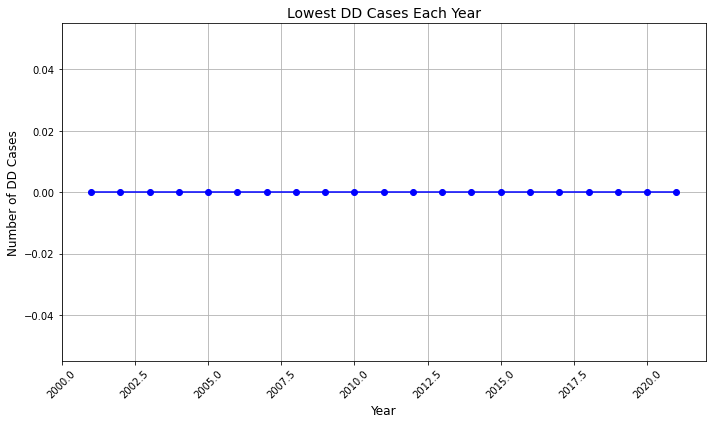

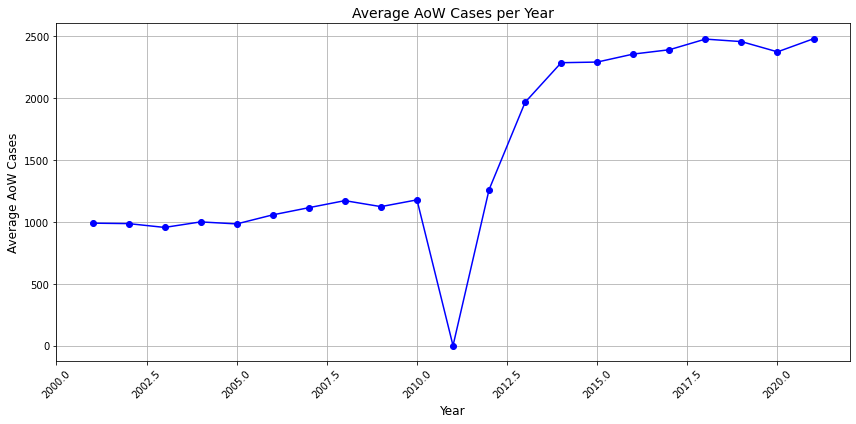

Highest AoW Cases each year:
      Year           State    AoW
13   2001  madhya pradesh   7063
47   2002  madhya pradesh   7118
81   2003  madhya pradesh   6848
115  2004  madhya pradesh   6690
149  2005  madhya pradesh   6426
183  2006  madhya pradesh   6243
217  2007  madhya pradesh   6772
251  2008  madhya pradesh   6445
285  2009  madhya pradesh   6307
319  2010  madhya pradesh   6646
340  2011  andhra pradesh      0
389  2012  madhya pradesh   6655
425  2013  madhya pradesh   8252
462  2014     maharashtra  10001
498  2015     maharashtra  11713
534  2016     maharashtra  11396
582  2017   uttar pradesh  12607
618  2018   uttar pradesh  12555
654  2019   uttar pradesh  11988
682  2020        nagaland  12605
718  2021        nagaland  14853


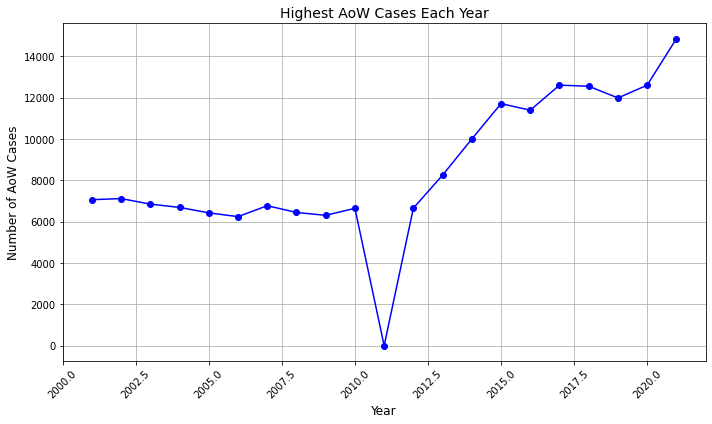

Lowest AoW Cases each year:
      Year           State  AoW
22   2001          sikkim    0
65   2002     daman & diu    0
100  2003     lakshadweep    1
134  2004     lakshadweep    0
168  2005     lakshadweep    0
202  2006     lakshadweep    0
234  2007    d & n haveli    0
270  2008     lakshadweep    0
304  2009     lakshadweep    0
338  2010     lakshadweep    0
340  2011  andhra pradesh    0
400  2012       telangana    0
436  2013       telangana    0
482  2014     lakshadweep    1
515  2015      d&n haveli    5
551  2016      d&n haveli    1
590  2017     lakshadweep    0
626  2018     lakshadweep    0
659  2019      d&n haveli    3
698  2020     lakshadweep    3
734  2021     lakshadweep    1


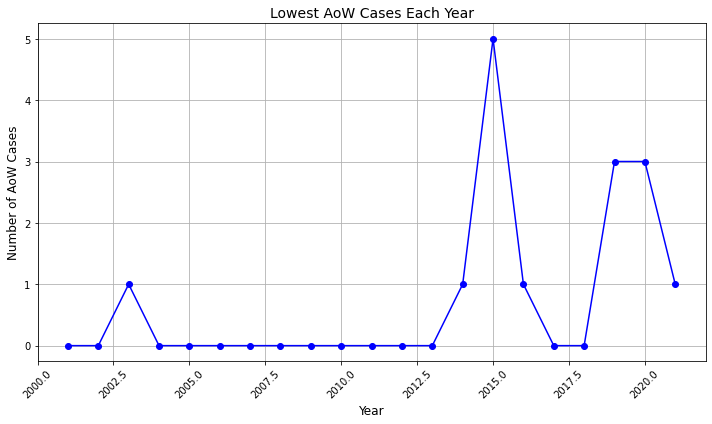

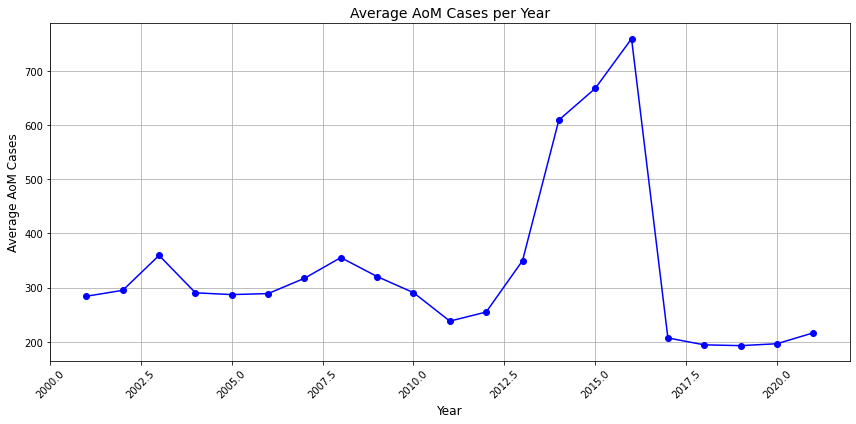

Highest AoM Cases each year:
      Year           State   AoM
25   2001   uttar pradesh  2575
34   2002  andhra pradesh  2024
93   2003   uttar pradesh  4970
127  2004   uttar pradesh  2682
161  2005   uttar pradesh  2881
195  2006   uttar pradesh  2714
204  2007  andhra pradesh  3316
238  2008  andhra pradesh  3551
272  2009  andhra pradesh  3520
306  2010  andhra pradesh  4562
340  2011  andhra pradesh  3658
376  2012  andhra pradesh  3714
412  2013  andhra pradesh  4702
474  2014   uttar pradesh  4435
510  2015   uttar pradesh  5925
546  2016   uttar pradesh  9422
556  2017  andhra pradesh  1998
592  2018  andhra pradesh  1802
628  2019  andhra pradesh  1892
664  2020  andhra pradesh  2342
700  2021  andhra pradesh  2370


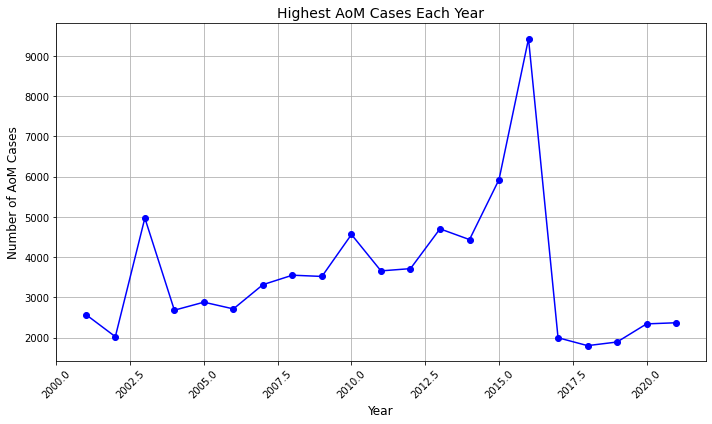

Lowest AoM Cases each year:
      Year              State  AoM
15   2001            manipur    0
49   2002            manipur    0
69   2003  arunachal pradesh    0
103  2004  arunachal pradesh    0
137  2005  arunachal pradesh    0
185  2006            manipur    0
219  2007            manipur    0
253  2008            manipur    0
290  2009           nagaland    0
321  2010            manipur    0
341  2011  arunachal pradesh    0
392  2012          meghalaya    0
427  2013            manipur    0
464  2014          meghalaya    0
515  2015         d&n haveli    0
551  2016         d&n haveli    0
574  2017           nagaland    0
609  2018            mizoram    1
645  2019            mizoram    0
685  2020          rajasthan    0
716  2021          meghalaya    0


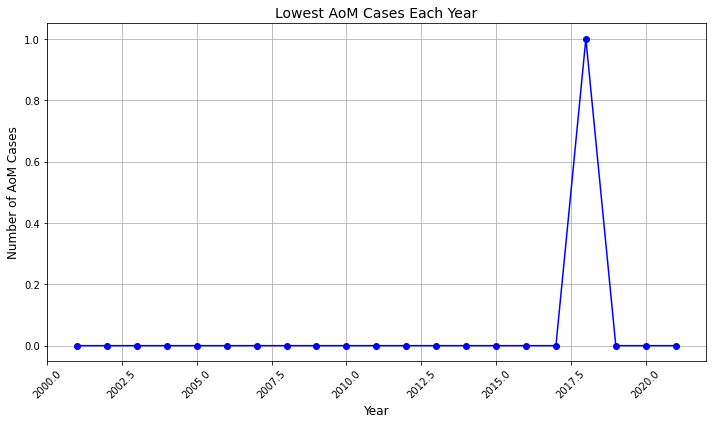

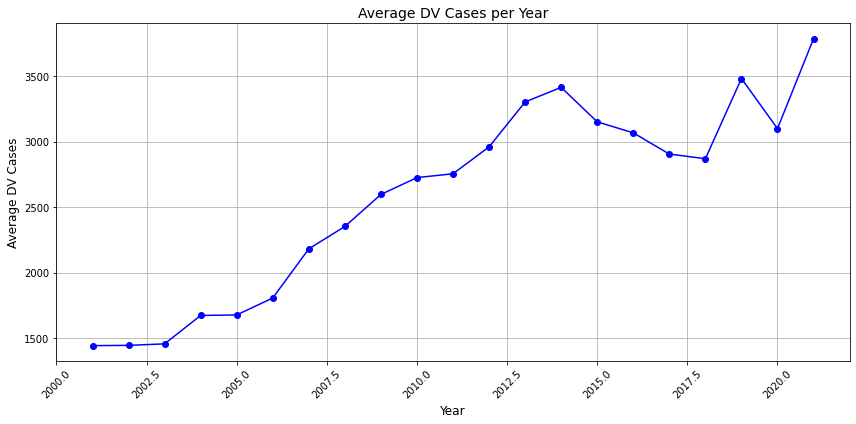

Highest DV Cases each year:
      Year           State     DV
25   2001   uttar pradesh   7365
34   2002  andhra pradesh   7018
68   2003  andhra pradesh   8167
102  2004  andhra pradesh   8388
136  2005  andhra pradesh   8696
170  2006  andhra pradesh   9164
204  2007  andhra pradesh  11335
265  2008     west bengal  13663
299  2009     west bengal  16112
333  2010     west bengal  17796
368  2011     west bengal  19772
404  2012     west bengal  19865
440  2013     west bengal  18116
476  2014     west bengal  23278
512  2015     west bengal  20163
548  2016     west bengal  19302
584  2017     west bengal  16800
620  2018     west bengal  16951
649  2019       rajasthan  18432
691  2020     uttarakhand  19962
727  2021     uttarakhand  19952


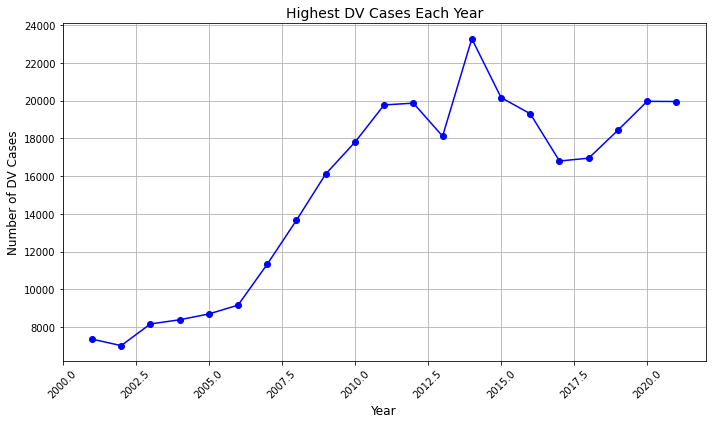

Lowest DV Cases each year:
      Year        State  DV
18   2001     nagaland   0
50   2002    meghalaya   0
86   2003     nagaland   0
119  2004      mizoram   0
153  2005      mizoram   0
187  2006      mizoram   1
222  2007     nagaland   0
270  2008  lakshadweep   1
290  2009     nagaland   0
338  2010  lakshadweep   0
364  2011    telangana   0
394  2012     nagaland   0
436  2013    telangana   0
482  2014  lakshadweep   0
506  2015       sikkim   2
542  2016       sikkim   2
590  2017  lakshadweep   2
614  2018       sikkim   1
646  2019     nagaland   0
698  2020  lakshadweep   0
705  2021          goa   1


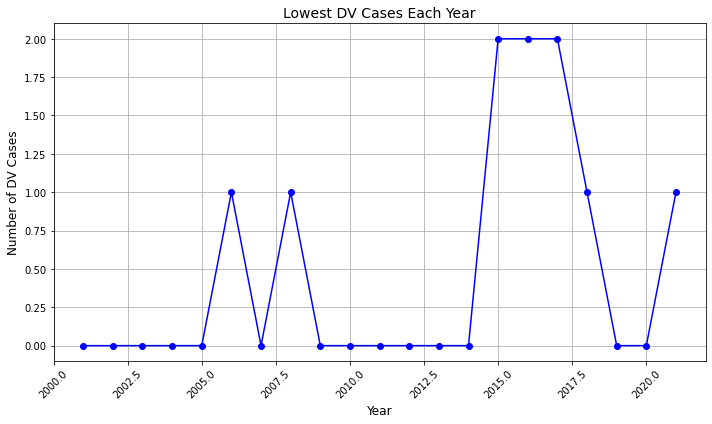

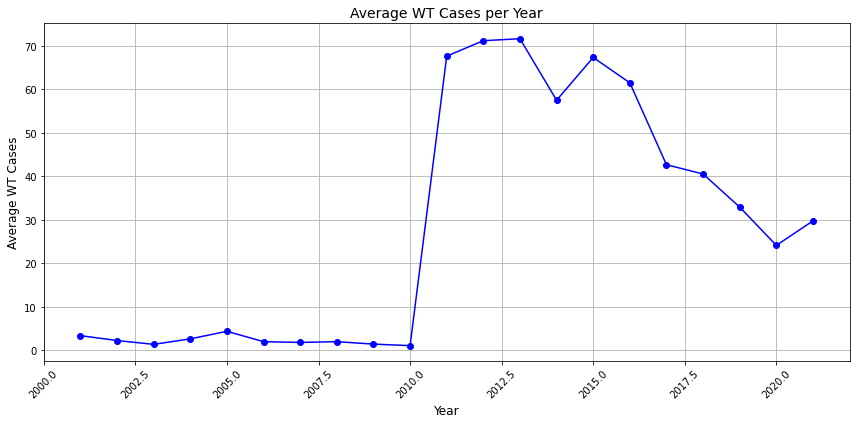

Highest WT Cases each year:
      Year           State   WT
3    2001           bihar   83
37   2002           bihar   38
71   2003           bihar   37
112  2004       jharkhand   36
139  2005           bihar   74
173  2006           bihar   42
207  2007           bihar   56
248  2008       jharkhand   39
275  2009           bihar   31
309  2010           bihar    8
340  2011  andhra pradesh  497
399  2012      tamil nadu  500
435  2013      tamil nadu  549
471  2014      tamil nadu  471
507  2015      tamil nadu  491
543  2016      tamil nadu  432
579  2017      tamil nadu  403
615  2018      tamil nadu  386
651  2019      tamil nadu  349
686  2020          sikkim  231
722  2021          sikkim  381


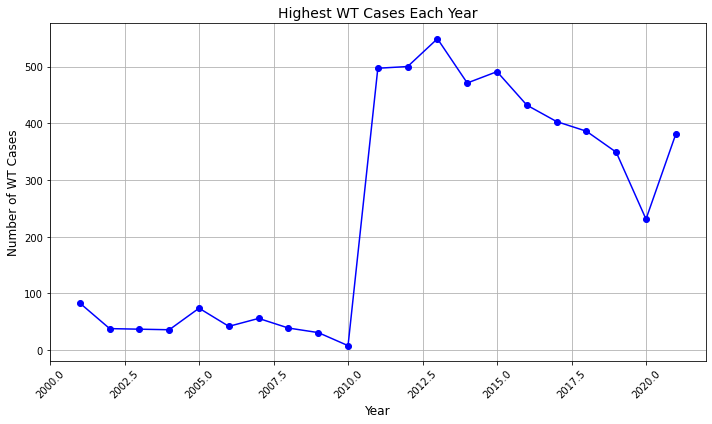

Lowest WT Cases each year:
      Year              State  WT
1    2001  arunachal pradesh   0
34   2002     andhra pradesh   0
69   2003  arunachal pradesh   0
103  2004  arunachal pradesh   0
137  2005  arunachal pradesh   0
170  2006     andhra pradesh   0
204  2007     andhra pradesh   0
238  2008     andhra pradesh   0
272  2009     andhra pradesh   0
306  2010     andhra pradesh   0
341  2011  arunachal pradesh   0
393  2012            mizoram   0
427  2013            manipur   0
449  2014  arunachal pradesh   0
493  2015    jammu & kashmir   0
521  2016  arunachal pradesh   0
565  2017    jammu & kashmir   0
593  2018  arunachal pradesh   0
629  2019  arunachal pradesh   0
665  2020  arunachal pradesh   0
701  2021  arunachal pradesh   0


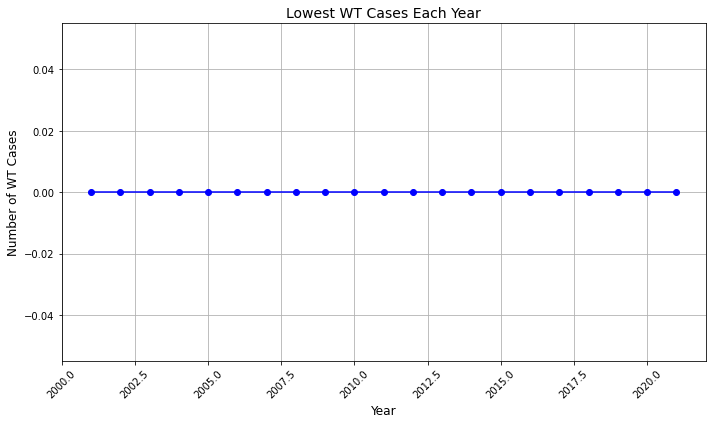

In [23]:
for col in columns:
    # Average cases per year
    avg_cases_per_year = df.groupby('Year')[col].mean()

    # Creating the plot for average cases
    plt.figure(figsize=(12, 6))
    plt.plot(avg_cases_per_year.index, avg_cases_per_year.values, marker='o', color='b', label=f'Average {col} Cases')
    plt.grid(True)

    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'Average {col} Cases', fontsize=12)
    plt.title(f'Average {col} Cases per Year', fontsize=14)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

    # Highest cases each year
    highest_cases = df.loc[df.groupby('Year')[col].idxmax()]
    print(f"Highest {col} Cases each year:\n", highest_cases[['Year', 'State', col]])

    plt.figure(figsize=(10, 6))
    plt.plot(highest_cases['Year'], highest_cases[col], marker='o', linestyle='-', color='b')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'Number of {col} Cases', fontsize=12)
    plt.title(f'Highest {col} Cases Each Year', fontsize=14)
    plt.grid(True)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

    # Lowest cases each year
    lowest_cases = df.loc[df.groupby('Year')[col].idxmin()]
    print(f"Lowest {col} Cases each year:\n", lowest_cases[['Year', 'State', col]])

    plt.figure(figsize=(10, 6))
    plt.plot(lowest_cases['Year'], lowest_cases[col], marker='o', linestyle='-', color='b')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'Number of {col} Cases', fontsize=12)
    plt.title(f'Lowest {col} Cases Each Year', fontsize=14)
    plt.grid(True)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()



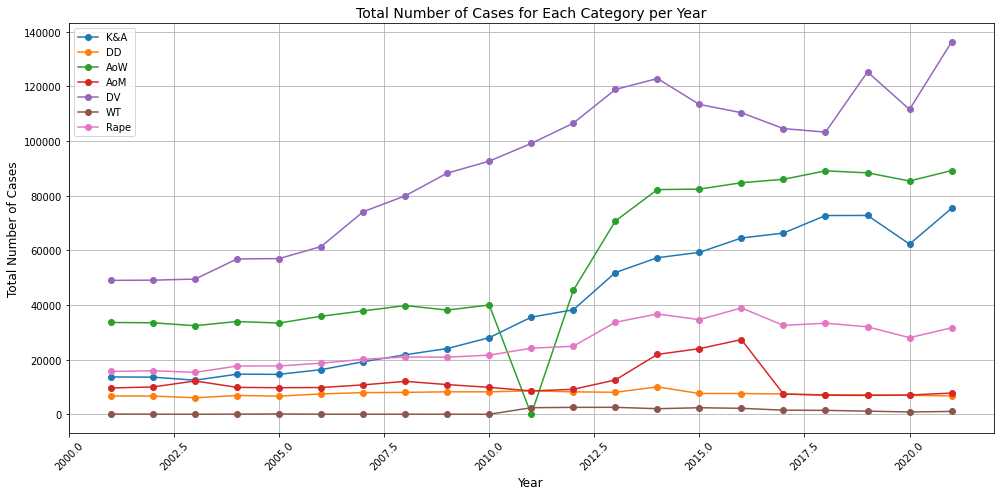

In [24]:
columns.append('Rape')
# Extra Analysis: Total Cases for Each Category over the Years
total_cases_per_year = df.groupby('Year')[columns].sum()

plt.figure(figsize=(14, 7))
for col in columns:
    plt.plot(total_cases_per_year.index, total_cases_per_year[col], marker='o', linestyle='-', label=col)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of Cases for Each Category per Year', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

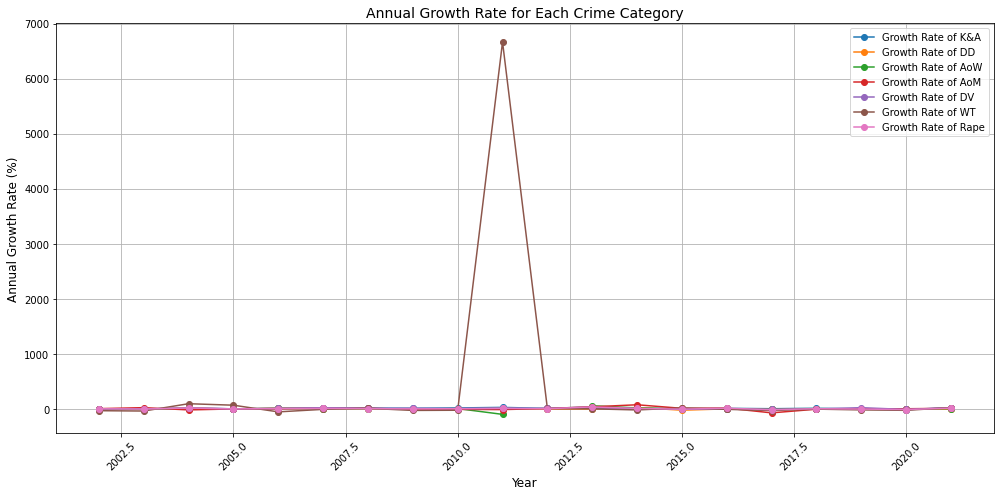

In [25]:
# Calculate annual growth rate for each crime category
growth_rate = df.groupby('Year')[columns].sum().pct_change() * 100

plt.figure(figsize=(14, 7))
for col in columns:
    plt.plot(growth_rate.index, growth_rate[col], marker='o', linestyle='-', label=f'Growth Rate of {col}')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Growth Rate (%)', fontsize=12)
plt.title('Annual Growth Rate for Each Crime Category', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1008x504 with 0 Axes>

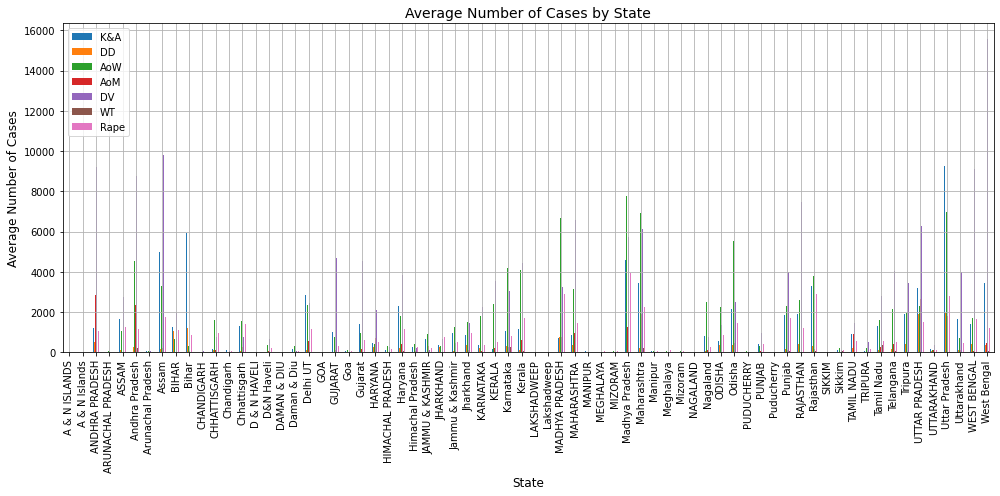

In [26]:
# Average cases by state
avg_cases_by_state = df.groupby('State')[columns].mean()

plt.figure(figsize=(14, 7))
avg_cases_by_state.sort_values(by='DD').plot(kind='bar', figsize=(14, 7), stacked=True)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Number of Cases', fontsize=12)
plt.title('Average Number of Cases by State', fontsize=14)
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [27]:
avg_cases_by_state

,K&A,DD,AoW,AoM,DV,WT,Rape
State,,,,,,,
a & n islands,17.285714,0.619048,26.571429,6.428571,17.380952,0.476190,20.190476
andhra pradesh,1033.666667,388.809524,4384.952381,2604.000000,8976.714286,121.333333,1115.428571
arunachal pradesh,60.571429,0.190476,75.428571,4.619048,33.571429,0.333333,54.904762
assam,3402.952381,131.285714,2243.571429,128.476190,6448.333333,16.333333,1532.857143
bihar,3699.380952,1163.238095,473.952381,38.095238,2627.952381,39.285714,1000.285714
chandigarh,73.666667,3.238095,45.428571,13.380952,80.428571,0.333333,37.857143
chhattisgarh,787.428571,85.571429,1586.190476,208.666667,780.047619,4.904762,1198.952381
d & n haveli,7.700000,0.100000,4.600000,0.400000,3.500000,0.000000,4.900000
d&n haveli,642.818182,23.181818,357.363636,76.000000,664.909091,1.090909,208.545455


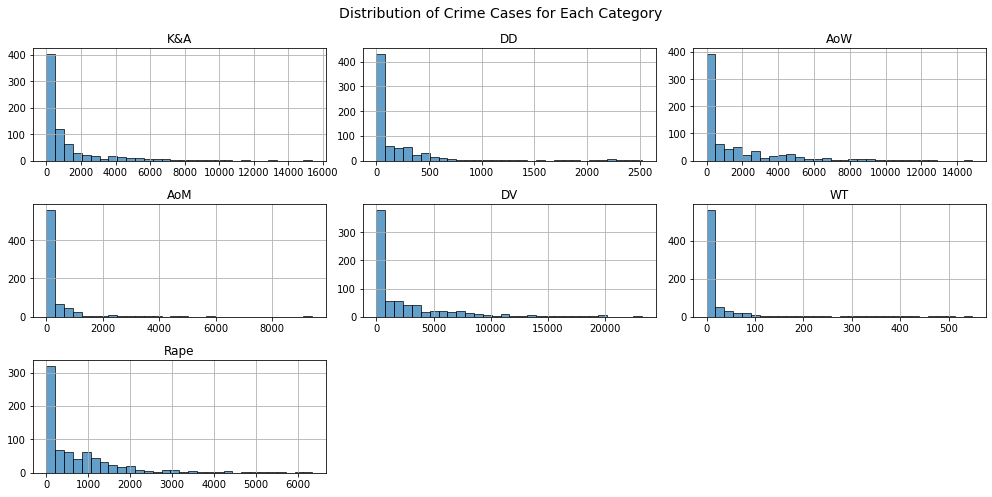

In [28]:
# Plot histograms for each crime category
df[columns].hist(figsize=(14, 7), bins=30, edgecolor='black', alpha=0.7)
plt.suptitle('Distribution of Crime Cases for Each Category', fontsize=14)
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


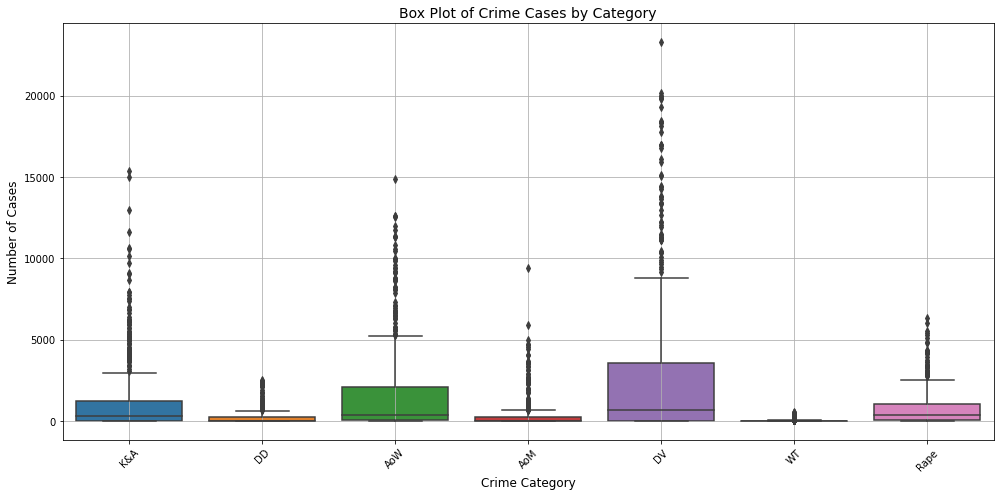

In [29]:
# Plot box plots for each crime category
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[columns])
plt.title('Box Plot of Crime Cases by Category', fontsize=14)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [102]:
df.State = df.State.apply(lambda nm:nm.title)

In [104]:
df

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,<built-in method title of str object at 0x0000...,2001,871,765,420,3544,2271,5791,7
1,<built-in method title of str object at 0x0000...,2001,33,55,0,78,3,11,0
2,<built-in method title of str object at 0x0000...,2001,817,1070,59,850,4,1248,0
3,<built-in method title of str object at 0x0000...,2001,888,518,859,562,21,1558,83
4,<built-in method title of str object at 0x0000...,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,<built-in method title of str object at 0x0000...,2021,1250,4083,141,2068,417,4731,4
732,<built-in method title of str object at 0x0000...,2021,315,904,16,1851,10,501,1
733,<built-in method title of str object at 0x0000...,2021,2,1,0,5,1,9,0
734,<built-in method title of str object at 0x0000...,2021,0,0,0,1,1,3,0
